## Dependencies

In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

## Data Retrieval

In [3]:
Unemployment_Dictionary = {"Hispanic": "Hispanic or Latino Unemployment Rate",
                          "Black": "Black Unemployment Rate",
                          "White": "White Unemployment Rate",
                          "Asian": "Asian Unemployment Rate",
                          "All Races": "All Unemployment Rate"}

In [4]:
# Read the data files for different races and write into a DataFrame
list_of_dict = []

mthyr2019 = ["Jan2019","Feb2019","Mar2019","Apr2019","May2019","Jun2019",
             "Jul2019","Aug2019","Sep2019","Oct2019","Nov2019","Dec2019"]

mthyr2020 = ["Jan2020","Feb2020","Mar2020","Apr2020","May2020","Jun2020",
             "Jul2020","Aug2020","Sep2020"]

mth2019 = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

mth2020 = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep"]

for key, val in Unemployment_Dictionary.items():
    race_row = {"Race":key}
    file_path = os.path.join("Resources",f"{val}.xlsx")
    df = pd.read_excel(file_path)
    df = df.loc[(df["Year"] == 2019) | (df["Year"] == 2020)]
    for index, row in df.iterrows():
        if(int(row["Year"]) == 2019):
            for mth in range(12):
                race_row[mthyr2019[mth]] = row[mth2019[mth]]
        else:
            for mth in range(9):
                race_row[mthyr2020[mth]] = row[mth2020[mth]]
    list_of_dict.append(race_row)

race_unemployment_df = pd.DataFrame(list_of_dict)
race_unemployment_df

,Race,Jan2019,Feb2019,Mar2019,Apr2019,May2019,Jun2019,Jul2019,Aug2019,Sep2019,...,Dec2019,Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020,Sep2020
0,Hispanic,4.8,4.3,4.7,4.2,4.2,4.3,4.5,4.2,3.9,...,4.2,4.3,4.4,6.0,18.9,17.6,14.5,12.9,10.5,10.3
1,Black,6.8,6.9,6.6,6.6,6.2,6.0,5.9,5.4,5.5,...,5.9,6.0,5.8,6.7,16.7,16.8,15.4,14.6,13.0,12.1
2,White,3.5,3.3,3.4,3.1,3.3,3.3,3.3,3.4,3.2,...,3.2,3.1,3.1,4.0,14.2,12.4,10.1,9.2,7.3,7.0
3,Asian,3.1,3.1,3.1,2.2,2.5,2.1,2.8,2.8,2.5,...,2.5,3.0,2.5,4.1,14.5,15.0,13.8,12.0,10.7,8.9
4,All Races,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,...,3.5,3.6,3.5,4.4,14.7,13.3,11.1,10.2,8.4,7.9


In [5]:
# Convert the DataFrame to have the Race as columns
race_df = race_unemployment_df.set_index("Race")
race_df = race_df.transpose()
race_df.reset_index(inplace=True)
race_df = race_df.rename(columns={"index":"Month"})
race_df

Race,Month,Hispanic,Black,White,Asian,All Races
0,Jan2019,4.8,6.8,3.5,3.1,4.0
1,Feb2019,4.3,6.9,3.3,3.1,3.8
2,Mar2019,4.7,6.6,3.4,3.1,3.8
3,Apr2019,4.2,6.6,3.1,2.2,3.6
4,May2019,4.2,6.2,3.3,2.5,3.6
5,Jun2019,4.3,6.0,3.3,2.1,3.7
6,Jul2019,4.5,5.9,3.3,2.8,3.7
7,Aug2019,4.2,5.4,3.4,2.8,3.7
8,Sep2019,3.9,5.5,3.2,2.5,3.5
9,Oct2019,4.1,5.5,3.2,2.8,3.6


## Data Visualization

* Create line plot for Unemployment Rate for various races. 

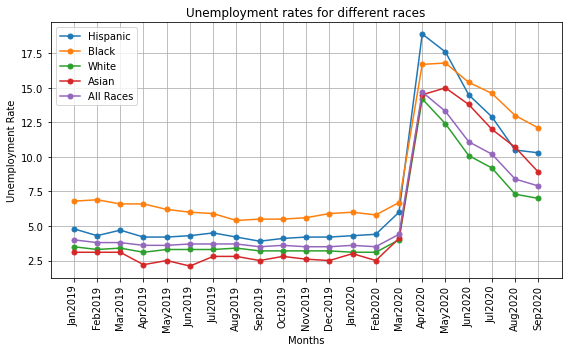

In [6]:
# Set plot size
plt.figure(figsize=(8,5))

# Generate line plots for each race
for key, val in Unemployment_Dictionary.items():
    plt.plot(race_df["Month"],race_df[key],marker="o",markersize=5, label=key)

# Set the orientation of the x axis labels
plt.xticks(rotation="vertical")

# Adds a legend and sets its location to best
plt.legend(loc="best")

# Set title, x and y labels 
plt.xlabel("Months")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment rates for different races")

# Add in a grid for the chart
plt.grid()

# Save and Display the line plot
plt.tight_layout()
plt.savefig("Images/race_lineplot.png")
plt.show()

## Which ethnicity/race has the highest/least unemployment rate pre and post covid?

* In the shown data below we were able to identify that the Black Race had the highest unemployment rate pre covid but the Hispanic race had the highest unemployment rate post covid, and was impacted the most from Covid. 

* In the shown data below we were able to identify that the Asian race had the lowest unemployment rate pre covid but the White race had the lowest unemployment race post covid, and was impacted the least from Covid.

* In the shown data below we were able to identify that the Average Unemployment Rate for all races during Covid was STILL LOWER than the Asian, Black and Hispanic unemployment rate.

![Race Unemployment Line Plot](Images/race_lineplot.png)